In [1]:
import numpy as np
import pandas as pd

In [2]:


# get the features from the file features.txt
features = list()
with open('UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


# GET TRAINING FEATURES

In [3]:

# --- 1. Load Feature Names ---
# This step is needed to get the 'features' variable you used.
# We read the 2nd column (index 1) from features.txt.
try:
    features_df = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)
    feature_names = features_df[1].tolist()
except FileNotFoundError:
    print("Error: 'features.txt' not found. Make sure it's in the 'UCI HAR Dataset' folder.")
    # You would typically exit or handle this error, but for demonstration:
    feature_names = [] # Set to empty list to show the error

# --- 2. Load Training Data (X_train) ---
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)

# Set the column names
if feature_names:
    X_train.columns = feature_names # <-- Fixed: No extra brackets [ ]
else:
    print("Warning: Feature names not loaded. Columns will be numbered.")

# --- 3. Load Subject Data ---
# FIX: Read the CSV, then select the first column (index 0) to get a Series.
subject_series = pd.read_csv('UCI HAR Dataset/train/subject_train.txt', header=None)[0]

# --- 4. Load Activity Labels (y_train) ---
# FIX: Read with a proper column name, then select that column to get a Series.
y_train_series = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None, names=['Activity'])['Activity']

# --- 5. Combine All Data into One DataFrame ---
# It's good practice to copy X_train to avoid modifying the original
train = X_train.copy()

# Add the new columns
train['subject'] = subject_series
train['Activity'] = y_train_series

# --- 6. Map Activity Names ---
# Your mapping code is perfect!
activity_map = {
    1: 'WALKING', 
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING', 
    5: 'STANDING',
    6: 'LAYING'
}

train['ActivityName'] = train['Activity'].map(activity_map)

# --- 7. Display a Sample ---
# Using .head() or .sample() is a great way to check your work
print("Data loaded successfully. Displaying first few data set:")
train.head(2)



C:\Users\new user\AppData\Local\Temp\ipykernel_17012\1967201394.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features_df = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)
C:\Users\new user\AppData\Local\Temp\ipykernel_17012\1967201394.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)


Data loaded successfully. Displaying first few data set:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING


In [4]:
# You can also check the new columns specifically
print("\nChecking subject, Activity, and ActivityName columns:")
print(train[['subject', 'Activity', 'ActivityName']].head(5))


Checking subject, Activity, and ActivityName columns:
   subject  Activity ActivityName
0        1         5     STANDING
1        1         5     STANDING
2        1         5     STANDING
3        1         5     STANDING
4        1         5     STANDING


In [5]:
train.shape

(7352, 564)

# GETTING TEST DATA

In [6]:
# --- 1. Load Test Data (X_test) ---
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)

# Set the column names
if 'feature_names' in locals():
    X_test.columns = feature_names # <-- Fixed: No extra brackets [ ]
else:
    print("Warning: 'feature_names' not found. Columns will be numbered.")

# --- 2. Load Subject Data ---
# FIX: Read the CSV, then select the first column (index 0) to get a Series.
subject_series_test = pd.read_csv('UCI HAR Dataset/test/subject_test.txt', header=None)[0]

# --- 3. Load Activity Labels (y_test) ---
# FIX: Read with a proper column name, then select that column to get a Series.
y_test_series = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None, names=['Activity'])['Activity']

# --- 4. Combine All Data into One DataFrame ---
# Use .copy() to prevent SettingWithCopyWarning
test = X_test.copy()

# Add the new columns
test['subject'] = subject_series_test
test['Activity'] = y_test_series

# --- 5. Map Activity Names ---
# Your mapping code is perfect!
activity_map = {
    1: 'WALKING', 
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING', 
    5: 'STANDING',
    6: 'LAYING'
}

test['ActivityName'] = test['Activity'].map(activity_map)

# --- 6. Display a Sample ---
print("Test data loaded successfully. Displaying a random sample:")
print(test.head(2))


C:\Users\new user\AppData\Local\Temp\ipykernel_17012\2637941692.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)


Test data loaded successfully. Displaying a random sample:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  angle(tBodyAccMean,gravity)  \
0         -0.674302         -0.894088  ...                     0.006462   
1         -0.945823         -0.894088  ...                    -0.083495   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                               0.16292                         -0.825886   
1                               0.01750                         -0.434375   

   angle(t

In [7]:
# You can also check the new columns specifically
print("\nChecking subject, Activity, and ActivityName columns from the test set:")
print(test[['subject', 'Activity', 'ActivityName']].head(5))


Checking subject, Activity, and ActivityName columns from the test set:
   subject  Activity ActivityName
0        2         5     STANDING
1        2         5     STANDING
2        2         5     STANDING
3        2         5     STANDING
4        2         5     STANDING


# EDA

In [8]:
#cleaning data
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [9]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


C:\Users\new user\AppData\Roaming\Python\Python312\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.2)
  from scipy.stats import gaussian_kde
C:\Users\new user\AppData\Local\Temp\ipykernel_17012\3755273442.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


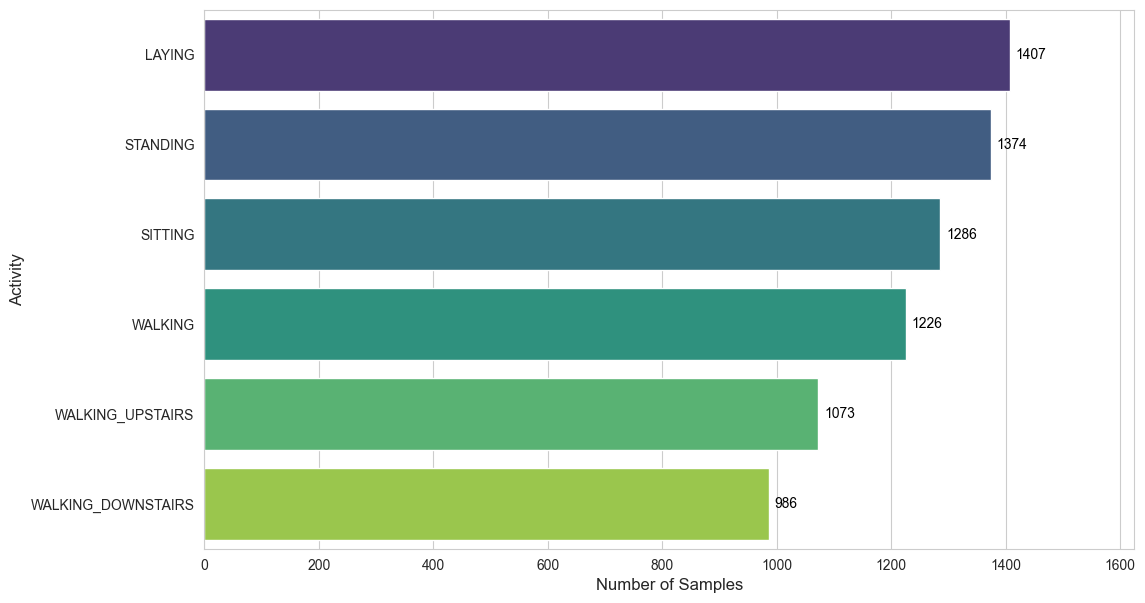

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Assuming 'train' is your loaded training DataFrame ---

# Set the style for a nice-looking plot
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 7)) # Made figure slightly wider for annotations

# Plot a bar chart (countplot)
ax = sns.countplot(
    y='ActivityName', 
    data=train,
    # Order the bars from most frequent to least frequent
    order=train['ActivityName'].value_counts().index,
    
    # --- NEW: Add a color palette ---
    # 'viridis', 'plasma', 'Set2', 'Paired' are all good options
    palette='viridis' 
)

# --- NEW: Add annotations (the counts) to each bar ---
for patch in ax.patches:
    # Get the width of the bar (which is the count)
    count = int(patch.get_width())
    
    # Get the y-coordinate (center of the bar)
    y_pos = patch.get_y() + patch.get_height() / 2
    
    # Get the x-coordinate (end of the bar)
    x_pos = patch.get_width()
    
    # Add the text to the plot
    ax.text(
        x=x_pos + 10,  # Add 10 points of padding so text isn't on the bar
        y=y_pos,
        s=f'{count}',  # The text to display
        ha='left',     # Horizontal alignment
        va='center',   # Vertical alignment
        color='black',
        fontsize=10
    )

# --- NEW: Adjust x-axis to make room for the text ---
# Get current x-axis limits
current_xlim = ax.get_xlim()
# Set the new x-limit to be 10% wider
ax.set_xlim(right=current_xlim[1] * 1.1)


# Add a clear title and labels
#plt.title('Figure 8: Distribution of Activities in the Training Set', fontsize=16)
plt.xlabel('Number of Samples', fontsize=12)
plt.ylabel('Activity', fontsize=12)

# Show the plot
plt.show()

Using 'tBodyAcc-mean()-X' instead.


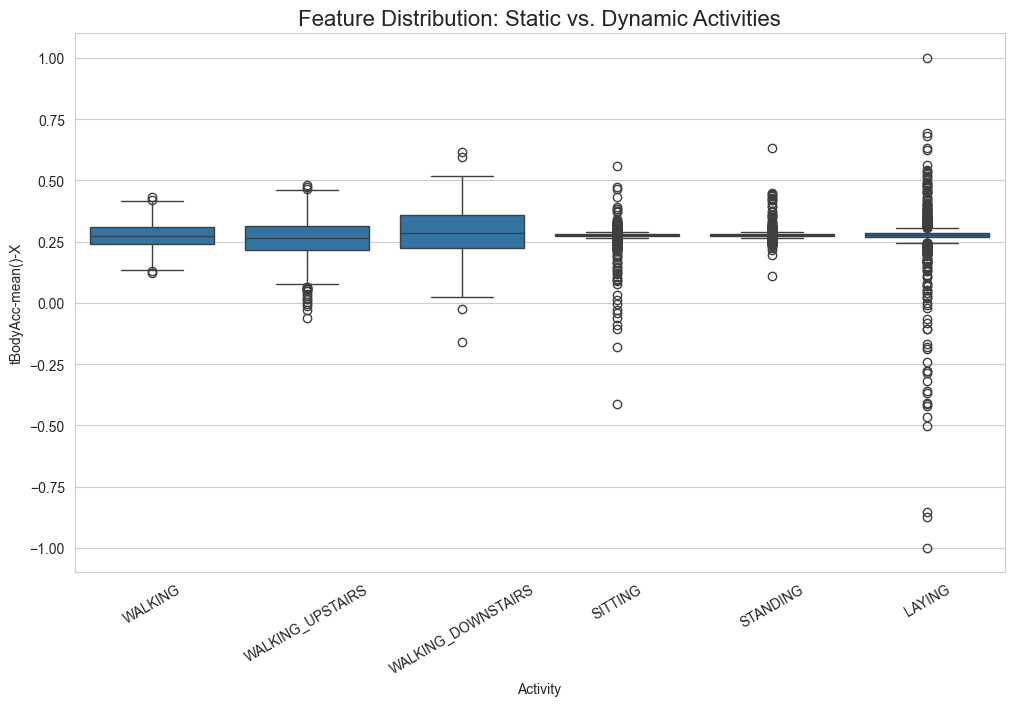

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# We'll use a feature that represents the magnitude of body acceleration
# If this feature isn't in your 'feature_names', 
# find a similar one like 'tBodyAcc-mean()-X'
feature_to_plot = 'tBodyAcc-mag-mean()' 

# Check if the feature exists
if feature_to_plot not in train.columns:
    print(f"Warning: '{feature_to_plot}' not found.")
    # Fallback to a common, representative feature
    feature_to_plot = 'tBodyAcc-mean()-X' 
    print(f"Using '{feature_to_plot}' instead.")


plt.figure(figsize=(12, 7))
sns.boxplot(
    x='ActivityName', 
    y=feature_to_plot, 
    data=train,
    # Order the activities logically
    order=[
        'WALKING', 
        'WALKING_UPSTAIRS', 
        'WALKING_DOWNSTAIRS', 
        'SITTING', 
        'STANDING', 
        'LAYING'
    ]
)

plt.title('Feature Distribution: Static vs. Dynamic Activities', fontsize=16)
plt.ylabel(feature_to_plot)
plt.xlabel('Activity')
plt.xticks(rotation=30) # Rotate labels so they don't overlap
plt.show()

Running t-SNE on 3000 samples... this may take a minute.


C:\Users\new user\AppData\Roaming\Python\Python312\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE complete.


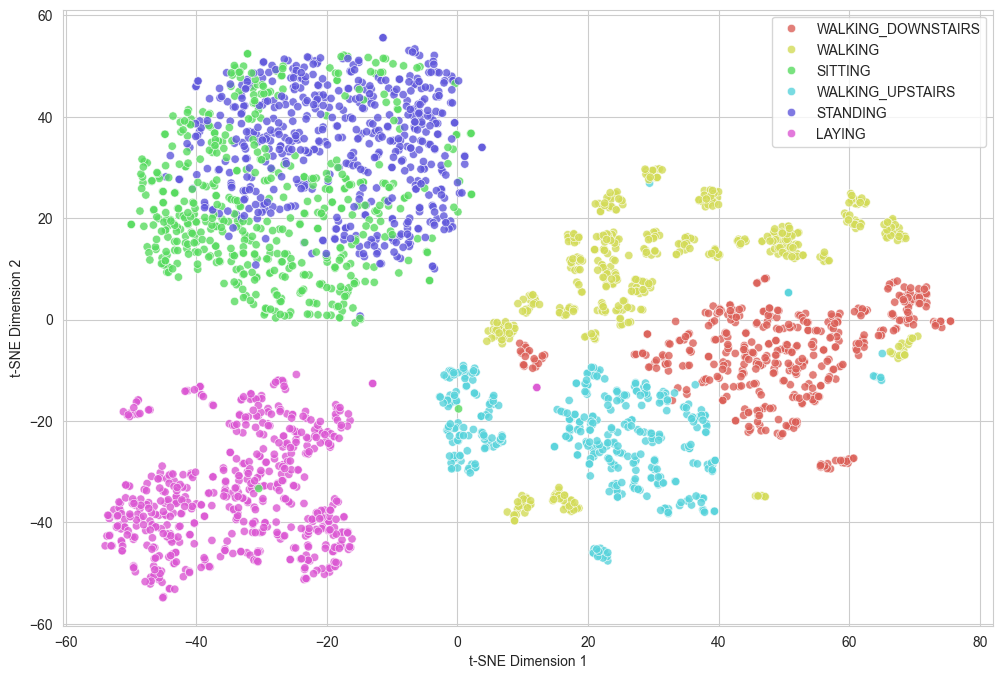

In [12]:
from sklearn.manifold import TSNE
import numpy as np # Make sure numpy is imported

# t-SNE is computationally expensive. Let's use a sample.
n_samples = 3000
train_sample = train.sample(n=n_samples, random_state=42)

# Get the features and labels from the sample
X_sample = train_sample.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_sample = train_sample['ActivityName']

print(f"Running t-SNE on {n_samples} samples... this may take a minute.")

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)

# Run the transformation
tsne_results = tsne.fit_transform(X_sample)

print("t-SNE complete.")

# --- Plot the results ---
tsne_df = pd.DataFrame(
    data={
        'tsne-1': tsne_results[:,0],
        'tsne-2': tsne_results[:,1],
        'Activity': y_sample
    }
)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="tsne-1", y="tsne-2",
    hue="Activity",
    data=tsne_df,
    palette=sns.color_palette("hls", 6), # 6 distinct colors
    legend="full",
    alpha=0.8
)

#plt.title('t-SNE Visualization of Activity Clusters (2D)', fontsize=16)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(loc='best')
plt.show()